In order to successfully complete this assignment you need to submit this notebook to the `exercise` folder in your `cmse802-yourlastname` repository by 10pm __the SAME DAY of the class__. Late assignment will receive <=80% of the grade.

__<font color=red>Members of the same group can submit the same notebook. You don't need to create your own.</font>__

### <p style="text-align: right;"> &#9989; Rupita Tahsin

---
# __Agent Based Modeling: Ant Foraging Model __

<img src="https://miro.medium.com/max/1440/1*yrVzKSeqaA1O3G3HF-AHlw.gif" alt="animated image of birds flocking in real life and in an agent based model">

Image from: [Danil Nagy
 blog on Behavioral Systems](https://medium.com/generative-design/behavioral-systems-d010d0d11932_)



# Learning objectives

At the end of the exercise, you should be able to:
- Explain what agent based modeling is.
- Practice coding agent based model.

# Outline


1. [Review of pre-class assignment](#Review_of_pre-class_assignment)
2. [Agent Based Modeling (ABM)](#Agent_Based_Modeling)

----
<a name="preclass"></a>

# 1. Pre-Class Assignment Review

In your group, discussion the following.

&#9989; <font color=red>**QUESTION:**</font> Did you get stuck doing pre-class exercise or find some ideas confusing? If so where did you get stuck? What did you find confusing? What solutions did your groupmates suggest?

<font size=+3>&#9998;</font> Replace with your answer to the above question!

We didn't get stuck with anything particularly the net logo application was fun so we tried out different models and looked at them.

One thing we found difficult is distinguishing between which is agent and which is environment because they are often in constant interaction.

# 2. Agent Based Modeling for Ant Foraging


In this project, a colony of ants forages(looking) for food. Though each ant follows a set of simple rules, the colony as a whole acts in a sophisticated way.

**HOW IT WORKS**
At the beginning, the each ant generally exploits the food source randomly. When an ant finds a piece of food, it carries the food back to the nest, dropping a chemical as it moves. When other ants "sniff" the chemical, they follow the chemical toward the food. As more ants carry food to the nest, they reinforce the chemical trail. It is more difficult for the ants to form a stable trail to the more distant food, since the chemical trail has more time to evaporate and diffuse before being reinforced.

The EVAPORATION-RATE is a parameter that controls the evaporation rate of the chemical.




---
<a name="Ant_forging_code_review"></a>
## 2.2 Ant forging code review

Reading other people's code is a skill that every programmer should try and master.  It is often difficult and annoying because it can be tricky to get into other programmer's head.    

&#9989; **<font color=red>QUESTION:</font>**  Study the procedural code for an ant-forging simulation given below. Understand what each part of the code is doing. Write markdown comments after "<i># ==></i>" in the code. The comments should be concise but with enough information for readers.  

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import random 
import numpy as np

from IPython.display import display, clear_output
import time


# ==> Defining the total number of points as ants, size of the grid, and other constants
num_ants = 100
x_dim = 70
y_dim = 30
EVAPORATION_RATE = 1

# ==> Creating two empty array of the same size as the grid  called smell for plotting the pheromones trail 
#and the one called food for storing the location coordinates of the food 
smell = np.zeros((x_dim,y_dim))
food = np.zeros((x_dim,y_dim))

# ==>Assigning the range of x and y coordinates where we left the food 
food[45:50, 25:30] = 10
food[60:65, 5:10] = 10

# ==> Creating random initial location with x and y coordinates for the entire colony of ants
ant_loc = np.zeros((num_ants,2))
for a in range(num_ants):
    ant_loc[a,0] = np.random.randint(0,x_dim)
    ant_loc[a,1] = np.random.randint(0,y_dim)
     
# ==> Creating an empty one dimensional array for storing the property of whether the ant has food with it or not.
#This array has bianary values if the value is 1 it has food if zero then no food.

has_food = np.zeros(num_ants)

#This is a string list defining the four movements
directions = ['up', 'left', 'down', 'right']


fig, ax = plt.subplots(figsize=(10,5))

# Main simulation loop
for i in range(500):
    
    # ==> Here a is the iteration index and we are storing the initial location of every ant in the grid an x coordinate and a y coordinate
    #in two variables x and y which will update in the next lines
    for a in range(0,num_ants):
        
        # ==> the 0 index or first colums in the array are x coordinates and 1 index or 2nd column are y coordinates
        x = int(ant_loc[a,0])
        y = int(ant_loc[a,1]) 
    
        # If ant is at home, put food down. The ant has no food carried on it. 
        if (x == 0 and y == 0):
            has_food[a] = 0  
            
        # ==> Using this loop we are appending a value of 100 (pheromone level) to the smell array 
        #at the co-ordinates in the grid where there is an ant with food
        
        if (has_food[a] == 1):
            
            # ==> [Comment on the code till the end of the if/else statement below] 
            #This is deciding the first position change move of the ant randomly in the x direction or the y direction
            # First the lebgth and width is added up and then choosing randomly between 0 and 1 if 1 shows up the ant will move along x
            #if 0 shows up the ant will move vertically along y 
            #Both the horizontal and vertical motions are in steps of -1 to ensure the food carrying ant can go back to the home position (0,0) in least number of steps
            pick = np.zeros(x + y)
            pick[0:x] = 1          
            if ( np.random.choice(pick) == 1 ):
                x = x - 1
            else:
                y = y - 1

            # ==> [Comment on the next two if statements]
            # This is ensuring that during the random travel the ants stay within the grid. so if they are at home (0,0)
            #they don't start going in the negative direction
            if(x < 0):
                x = 0
            if(y < 0):
                y = 0
                
            # ==> Within this if statement if the ant is carrying food,
            #this line will add a value of 100 to the cordinates of the ants locations to the smell array 
            smell[x, y] = smell[x, y] + 100    
            
        else:
            # Check to see if there is pheromone around. 
            #This loop is for the case of ant only moving with no food carried, it will try to follow the pheromone trail
            #g is an array containing the motion direction command
            #m is an array containing the pheromone level in the next step
            
            g = [] 
            m  = [] 
            
            # ==>This is the logic for deciding the next step of the ant based on smelling in all 4 directions.
            #For all values of x within the grid size ensured by taking x+1<x_dim the ants check the smell level in the coordinate right to it or
            #+1 in x direction from its current position and appends it into the m array
            #This is coordinated with a right direction movement by appending "right" to the command array for direction at the same index
        
            if ( x + 1 < x_dim ):
                if ( smell[x+1, y] > 0 ):
                    m.append(smell[x+1, y])
                    g.append('right')
            
            # ==>Similar approach as last step only checking smell level in the left node to its current position 
            #and assigning a direction command value
            if ( x - 1 >=0 ):  #This should be x-1 there was a bug in the code
                if ( smell[x-1, y] > 0 ):
                    m.append(smell[x-1, y])
                    g.append('left')
                    
            # ==> Similar approach as last step only checking smell level in the bottom node to its current position 
            #and assigning a direction command value 
            if ( y + 1 < y_dim ):
                if ( smell[x, y+1] > 0 ):
                    m.append(smell[x, y+1])
                    g.append('up')
            # ==>  Similar approach as last step only checking smell level in the top node to its current position 
            #and assigning a direction command value     
            if ( y - 1 >= 0 ):
                if ( smell[x, y-1] > 0 ):
                    m.append(smell[x, y-1])
                    g.append('down')
                    
                             
            # ==> This loop takes the movement decision for the ant based on the pheromone concentration
            #if there exists pheromone data then The index with highest value of m gets chosen and the direction command of that index is executed from g
            #otherwise if no pheromone it takes a random choice by picking either left,right,top or bottom 
            if ( g != [] ):
                grad = g[m.index(max(m))]
            else:
                grad = random.choice(directions)
                
            # Move the ant in one of the four directions.
            if ( grad == 'up' ):
                y = y + 1
            elif ( grad == 'right' ):
                x = x + 1
            elif ( grad == 'down' ):
                y = y - 1
            elif ( grad == 'left' ):
                x = x - 1
            else:
                print(grad)
                print("ERROR!!!!!!!!!!!!")

            # ==> This part ensures that if the ants next location somehow goes outside the grids maximum x or y values or less than
            #the grids lowest x or y values the position is set to within grid
            #This essentially keeps the ants in the grid always
            if ( x < 0 ):
                x = 0
            if ( y < 0 ):
                y = 0
            if ( x > x_dim - 1 ):
                x = x_dim - 1
            if ( y > y_dim - 1 ):
                y = y_dim - 1
    
            # If an ant is on the grid with food, the ant picks food and food level is 
            # subtracted by 1.
            if food[x, y] > 0:
                has_food[a] = 1
                food[x,y] = food[x,y] - 1
                                
        
        # update ant location
        ant_loc[a,0] = x
        ant_loc[a,1] = y
    
    # ==> This ensures that with each step motion of the ant the pheromone level carried decreases by 1 to model the evaporation 
    #of pheromone over time in nature
    smell = smell -  EVAPORATION_RATE
    smell[smell < 0] = 0
    

    # plot the universe
    plt.imshow(50*food.T+smell.T, origin='lower', aspect='equal')
    
    for a in range(0,num_ants):
        color = 'orange'
        if (has_food[a] == 1):
            color = 'g'
        plt.scatter(ant_loc[a,0], ant_loc[a,1], color=color)

    # Animaiton part (dosn't change)
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots
    time.sleep(0.0001)      # Sleep for a fraction of a second to allow animation to catch up    

## 2.3 Modifying the code 

&#9989; **<font color=red>QUESTION:</font>** Modify the above code to realize the following 
- The ants only respond to chemical levels between 20 and 100.
- Move the nest to the middle of the figure
- Let the ant "follows the gradient" of the chemical. That is, it "sniffs" in four directions, then turns in the direction where the chemical is strongest.


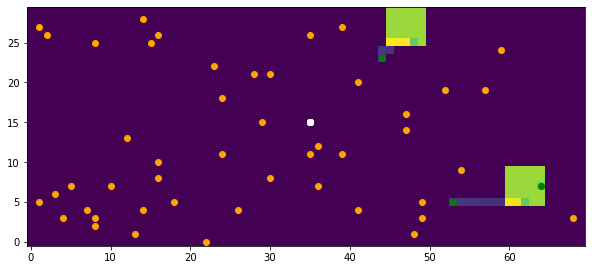

In [ ]:
#Put your modified code here
#modified code with pheromone level between 20-100 and home position switched
#The middle point of the grid is x=35 and y=15
#which we have use instead of x=0 and y=0 for nest position in all the main loops



%matplotlib inline

import matplotlib.pyplot as plt
import random 
import numpy as np

from IPython.display import display, clear_output
import time


#Defining a new coordinate for the nest position 
#x-coordinate in the 1st column and y-coordinate in second

nest= [35,15]

# ==> Defining the total number of points as ants, size of the grid, and other constants
num_ants = 50  #Reduced number to see faster convergence
x_dim = 70
y_dim = 30
EVAPORATION_RATE = 3 #Increased thsi slightly to prevent the random ants from following pheromone trail to nest 
#instead of food source

# ==> Creating two empty array of the same size as the grid  called smell for plotting the pheromones trail 
#and the one called food for storing the location coordinates of the food 
smell = np.zeros((x_dim,y_dim))
food = np.zeros((x_dim,y_dim))

# ==>Assigning the range of x and y coordinates where we left the food 
food[45:50, 25:30] = 10
food[60:65, 5:10] = 10

# ==> Creating random initial location with x and y coordinates for the entire colony of ants
ant_loc = np.zeros((num_ants,2))
for a in range(num_ants):
    ant_loc[a,0] = np.random.randint(0,x_dim)
    ant_loc[a,1] = np.random.randint(0,y_dim)
     
# ==> Creating an empty one dimensional array for storing the property of whether the ant has food with it or not.
#This array has bianary values if the value is 1 it has food if zero then no food.

has_food = np.zeros(num_ants)

#This is a string list defining the four movements
directions = ['up', 'left', 'down', 'right']


fig, ax = plt.subplots(figsize=(10,5))

# Main simulation loop
for i in range(500):
    
    # ==> Here a is the iteration index and we are storing the initial location of every ant in the grid an x coordinate and a y coordinate
    #in two variables x and y which will update in the next lines
    for a in range(0,num_ants):
        
        # ==> the 0 index or first colums in the array are x coordinates and 1 index or 2nd column are y coordinates
        x = int(ant_loc[a,0])
        y = int(ant_loc[a,1]) 
    
        # If ant is at home, put food down. The ant has no food carried on it. 
        #This part is changed to get new nest location in the middle of the grid
        if (x == nest[0] and y == nest[1]):
            has_food[a] = 0  
            
        # ==> Using this loop we are appending a value of 100 (pheromone level) to the smell array 
        #at the co-ordinates in the grid where there is an ant with food
        
        if (has_food[a] == 1):
            
            #If the ant has food move towards origin by deciding whether the x or y cood is farther away from the nest
            #If the ant is already in the nest, drop food
            #If you are travelling with food drop pheromone on the way
            
            ########################## Modified for new nest position in middle ############################### 
                
            if ( abs(x-nest[0]))>(abs(y-nest[1])):
                if x < nest[0]:
                    x = x + 1
                
                else:
                    x = x - 1
            
            else:
                if y < nest[1]:
                    y = y + 1
                
                else:
                    y = y - 1
                    
                    
             ################Upto this is our altered code in place of a random pick function used before########       

            # ==> [Comment on the next two if statements]
            # This is ensuring that during the random travel the ants stay within the grid. so if they are at home (0,0)
            #they don't start going in the negative direction
            if(x < 0):
                x = 0
            if(y < 0):
                y = 0
                
            # ==> Within this if statement if the ant is carrying food,
            #this line will add a value of 100 to the cordinates of the ants locations to the smell array 
            smell[x, y] = smell[x, y] + 100    
            
        else:
            # Check to see if there is pheromone around. 
            #This loop is for the case of ant only moving with no food carried, it will try to follow the pheromone trail
            #g is an array containing the motion direction command
            #m is an array containing the pheromone level in the next step
            
            g = [] 
            m  = [] 
            
            # ==>This is the logic for deciding the next step of the ant based on smelling in all 4 directions.
            #For all values of x within the grid size ensured by taking x+1<x_dim the ants check the smell level in the coordinate right to it or
            #+1 in x direction from its current position and appends it into the m array
            #This is coordinated with a right direction movement by appending "right" to the command array for direction at the same index
        
            ###############Here we will only use smell levels greater than 20##############
            ##############for detection so later the inequality to if smell [x+1,y]> 20##########
        
        
            if ( x + 1 < x_dim ):
                if ( smell[x+1, y] > 20 ):
                    m.append(smell[x+1, y])
                    g.append('right')
            
            # ==>Similar approach as last step only checking smell level in the left node to its current position 
            #and assigning a direction command value
            if ( x - 1 >=0 ):  #This should be x-1 there was a bug in the code
                if ( smell[x-1, y] > 20 ):
                    m.append(smell[x-1, y])
                    g.append('left')
                    
            # ==> Similar approach as last step only checking smell level in the bottom node to its current position 
            #and assigning a direction command value 
            if ( y + 1 < y_dim ):
                if ( smell[x, y+1] > 20):
                    m.append(smell[x, y+1])
                    g.append('up')
            # ==>  Similar approach as last step only checking smell level in the top node to its current position 
            #and assigning a direction command value     
            if ( y - 1 >= 0 ):
                if ( smell[x, y-1] > 20 ):
                    m.append(smell[x, y-1])
                    g.append('down')
                    
                             
            # ==> This loop takes the movement decision for the ant based on the pheromone concentration
            #if there exists pheromone data then The index with highest value of m gets chosen and the direction command of that index is executed from g
            #otherwise if no pheromone it takes a random choice by picking either left,right,top or bottom 
            if ( g != [] ):
                grad = g[m.index(max(m))]
            else:
                grad = random.choice(directions)
                
            # Move the ant in one of the four directions.
            if ( grad == 'up' ):
                y = y + 1
            elif ( grad == 'right' ):
                x = x + 1
            elif ( grad == 'down' ):
                y = y - 1
            elif ( grad == 'left' ):
                x = x - 1
            else:
                print(grad)
                print("ERROR!!!!!!!!!!!!")

            # ==> This part ensures that if the ants next location somehow goes outside the grids maximum x or y values or less than
            #the grids lowest x or y values the position is set to within grid
            #This essentially keeps the ants in the grid always
            if ( x < 0 ):
                x = 0
            if ( y < 0 ):
                y = 0
            if ( x > x_dim - 1 ):
                x = x_dim - 1
            if ( y > y_dim - 1 ):
                y = y_dim - 1
    
            # If an ant is on the grid with food, the ant picks food and food level is 
            # subtracted by 1.
            if food[x, y] > 0:
                has_food[a] = 1
                food[x,y] = food[x,y] - 1
                                
        
        # update ant location
        ant_loc[a,0] = x
        ant_loc[a,1] = y
    
    # ==> This ensures that with each step motion of the ant the pheromone level carried decreases to model the evaporation 
    #of pheromone over time in nature
    smell = smell -  EVAPORATION_RATE
    smell[smell < 20] = 0
    

    # plot the universe
    plt.imshow(50*food.T+smell.T, origin='lower', aspect='equal')
    
    for a in range(0,num_ants):
        color = 'orange'
        if (has_food[a] == 1):
            color = 'g'
        plt.scatter(ant_loc[a,0], ant_loc[a,1], color=color)
       #####Plotting the nest location as a white node######
        plt.scatter(nest[0], nest[1], color='white')
    # Animaiton part (dosn't change)
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots
    time.sleep(0.0001)      # Sleep for a fraction of a second to allow animation to catch up    

## 2.4 Using OOP 

Thinking about implementing an __objected oriented__ agent-based model for ant foraging.

&#9989; **<font color=blue>DO THIS:</font>** Discuss with group mates to form a plan to finish the following three steps. 

- Step 1: Think about what class object you want to define to represent the ants and what attributes the class object should have.
- Step 2 :Outline the program structure - sketch out a big picture of what you are trying to accomplish and what the inputs/outputs are.
- Step 3: Predict the final interface - decide how users will interact with your model.

Step 1: The users should only enter the number of ants they want and the number of simulation cycles. This will be read by the init function of the class. Define other constants as attibutes of the initclass.

Step 2: Pass this to an animate method that will run the number of cycles we want and show the image. For getting info for each loop, it will call the ants method.

Step 3: The method ants that will generate the locations of each ant for each loop following the set of rules stated above.

Step 4: User input should be the number of ants, number of cycles, origin coordinates, the length of x-axis and the length of y-axis.

-----
### Congratulations, we're done!

Remember to submit your notebook before the due date.